**Importing necessary libraries for data manipulation, visualization, and machine learning, ignoring warnings, and downloading the fraud detection dataset using KaggleHub.**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import kagglehub
ranjitmandal_fraud_detection_dataset_csv_path = kagglehub.dataset_download('ranjitmandal/fraud-detection-dataset-csv')

print('Data source import complete.')



Data source import complete.


## ***Introduction***  <a class="anchor"  id="chapter1"></a>

In [41]:
csv_file_path = f"{ranjitmandal_fraud_detection_dataset_csv_path}/Fraud Detection Dataset.csv"

# Read the CSV file using the obtained path
fraud_data = pd.read_csv(csv_file_path)
fraud_data.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


## ***Data Exploration Strategy*** <a class="anchor"  id="chapter2"></a>

In [4]:
print("Shape:", fraud_data.shape, '\n')
print("Data Types:", fraud_data.dtypes, '\n')
for col in fraud_data.columns:
    print(f"Unique Data Of The {col}:", fraud_data[col].unique())

Shape: (51000, 12) 

Data Types: Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object 

Unique Data Of The Transaction_ID: ['T1' 'T2' 'T3' ... 'T49998' 'T49999' 'T50000']
Unique Data Of The User_ID: [4174 4507 1860 ... 4616 2261 4210]
Unique Data Of The Transaction_Amount: [1292.76 1554.58 2395.02 ...  647.11 2446.65 2867.43]
Unique Data Of The Transaction_Type: ['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Unique Data Of The Time_of_Transaction: [16. 13. nan 15. 19.  2

**Exploring the dataset to identify key features by first addressing missing values and then analyzing both categorical and numerical data types.**

In [5]:
print('Nan Type Values:\n', fraud_data.isnull().sum())

Nan Type Values:
 Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64


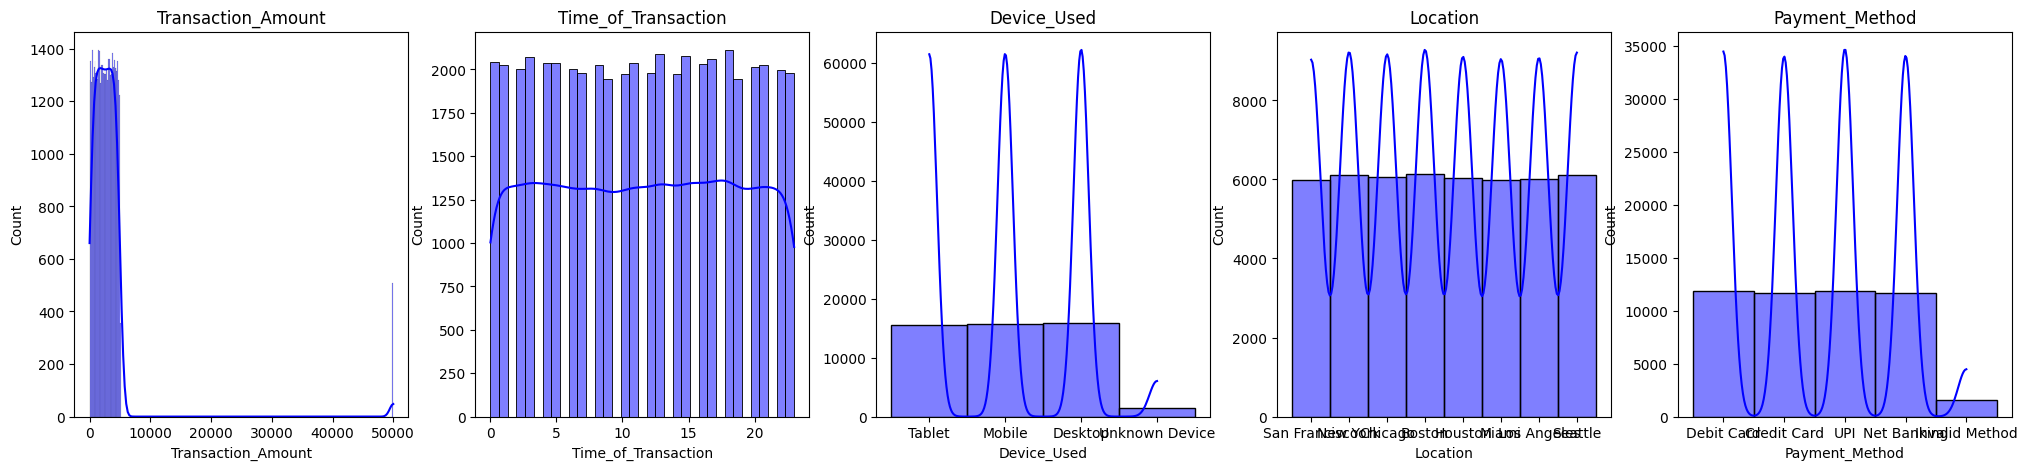

<Figure size 1000x1000 with 0 Axes>

In [6]:
missing_cols = [col for col in fraud_data.columns if fraud_data[col].isnull().sum() > 0]

fig, axes = plt.subplots(1, len(missing_cols), figsize=(5 * len(missing_cols), 5))

if len(missing_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, missing_cols):
    sns.histplot(fraud_data[col], kde=True, ax=ax, color='blue')
    ax.set_title(col)

plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.show()

**Addressing missing values by imputing categorical columns with a constant string 'Unknown' and numerical columns (Transaction_Amount and Time_of_Transaction) with their mean.**

In [7]:
for col in fraud_data.columns:
    if fraud_data[col].dtype == 'object':
        fraud_data[col] = fraud_data[col].fillna('Unknown')
    else:
        fraud_data[col] = fraud_data[col].fillna(fraud_data[col].mean())

In [8]:
fraud_data.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Time_of_Transaction,0
Device_Used,0
Location,0
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


**Checking to see whether the columns Transaction_ID and User_ID are of any
importance**

In [9]:
print("Unique Data of Transaction_ID:", len(fraud_data['Transaction_ID'].unique()))
print("Unique Data Of User_ID:", len(fraud_data['User_ID'].unique()))

Unique Data of Transaction_ID: 50000
Unique Data Of User_ID: 4000


**Values of the Transaction_ID column are not important for the prediction, so we can drop them out of the dataset. But the User_ID column holds important information, so we have to keep it.**

In [10]:
fraud_data.drop(['Transaction_ID'], axis=1, inplace=True)

## ***Data Preprocessing*** <a class="anchor"  id="chapter3"></a>

**Applying feature encoding: using LabelEncoder for exploratory data analysis (EDA) to simplify the data for statistical review and OneHotEncoding (pd.get_dummies) for preparing the data for machine learning models. OneHotEncoding is suitable for modeling as it creates binary columns for each category, which models can interpret effectively.**


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

fraud_data_eda = fraud_data.copy()
fraud_data_train = fraud_data.copy()

categorical_features = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']

for col in categorical_features:
    fraud_data_eda[col] = le.fit_transform(fraud_data_eda[col])

fraud_data_train = pd.get_dummies(fraud_data_train, columns=categorical_features)

**Looking at the Train Dataset**

In [12]:
print('Train Dataset:')
fraud_data_train.head()

Train Dataset:


,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,...,Location_New York,Location_San Francisco,Location_Seattle,Location_Unknown,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Payment_Method_Unknown
0,4174,1292.76,16.0000,0,119,13,0,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1,4507,1554.58,13.0000,4,79,3,0,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,1860,2395.02,11.4884,3,115,9,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
3,2294,100.10,15.0000,4,3,4,0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,2130,1490.50,19.0000,2,57,7,0,False,False,False,...,False,True,False,False,True,False,False,False,False,False


**Looking at the Dataset for performing EDA**

In [13]:
print('EDA Dataset:')
fraud_data_eda.head()

EDA Dataset:


,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,4174,1292.76,0,16.0000,2,6,0,119,13,1,0
1,4507,1554.58,0,13.0000,1,5,4,79,3,0,0
2,1860,2395.02,0,11.4884,1,8,3,115,9,5,0
3,2294,100.10,2,15.0000,0,1,4,3,4,4,0
4,2130,1490.50,4,19.0000,1,6,2,57,7,0,0


**Let's visualize the correlations between features using a heatmap. We will create a figure with dimensions 12x12 to accommodate all 12 features.**


<Axes: >

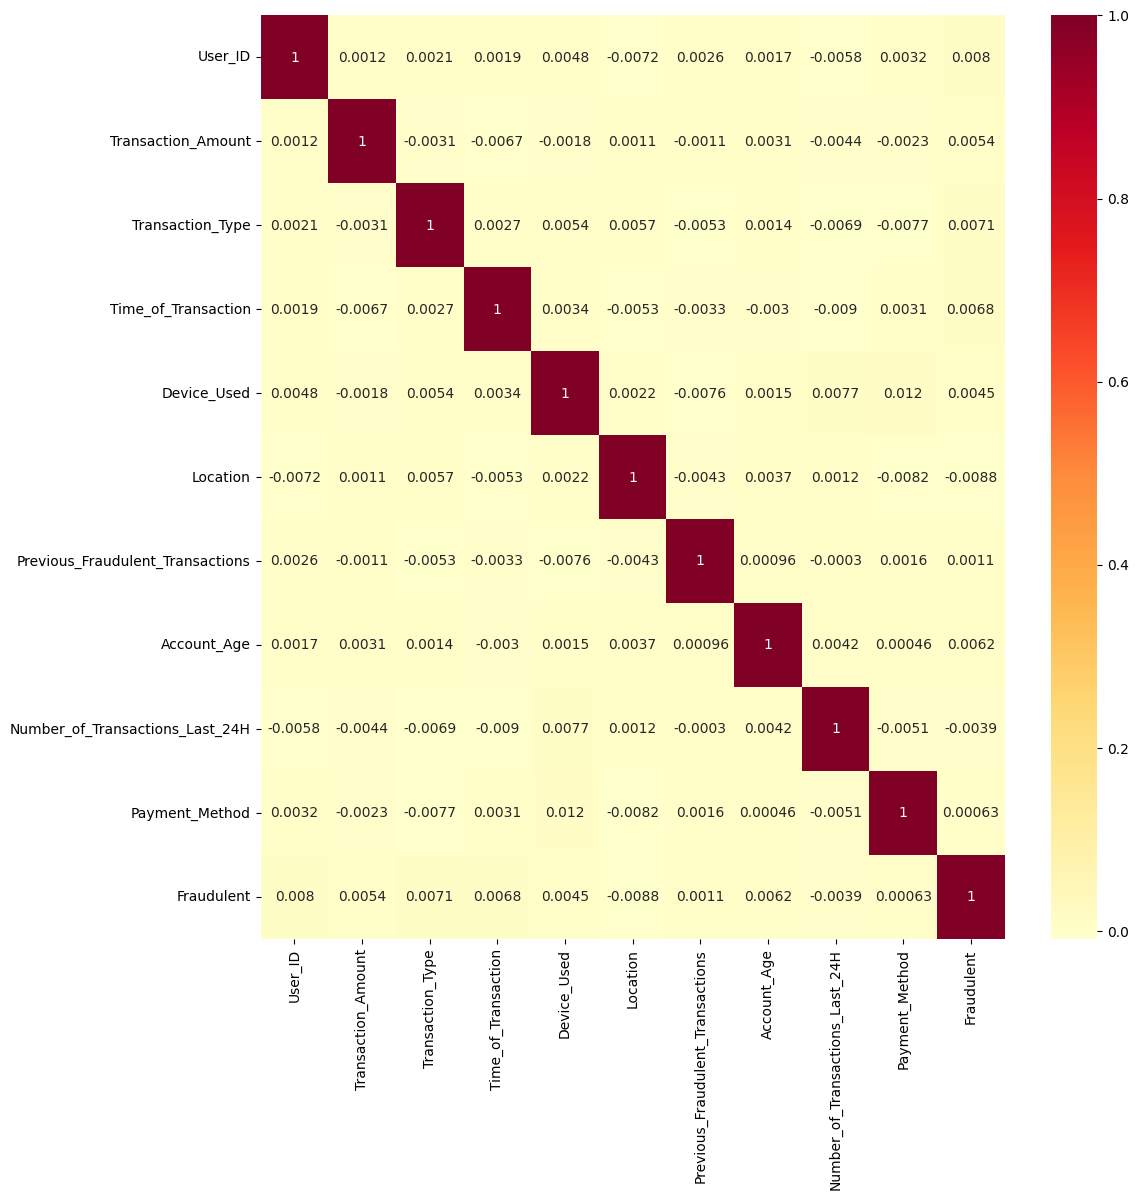

In [14]:
plt.figure(figsize=(12,12))

sns.heatmap(fraud_data_eda.corr(), annot=True, cmap='YlOrRd')

**The correlation between the target variable and features is low, possibly due to randomness or outliers. Box plots will be used to check for data noise.**

## ***Main Problem Of The Dataset*** <a class="anchor"  id="chapter4"></a>

**The main problem identified is that the dataset has unbalanced labels for the target variable (Fraudulent). This means there are significantly more instances of one class (non-fraudulent transactions) than the other (fraudulent transactions).This imbalance can make it challenging for standard machine learning models to accurately predict the minority class (fraudulent transactions).**

<Axes: xlabel='Fraudulent', ylabel='count'>

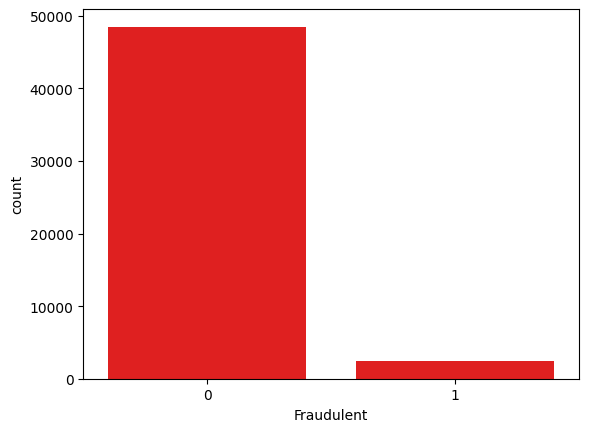

In [15]:
sns.countplot(x=fraud_data['Fraudulent'], color='Red')

In [16]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(fraud_data_eda.drop(['Fraudulent'], axis=1), fraud_data_eda['Fraudulent'])
print(mi_scores)

[1.12386132e-06 4.81186758e-04 3.60048403e-03 7.62522067e-04
 1.29745849e-03 4.44012768e-04 2.49282931e-03 1.16224500e-03
 1.10000238e-03 2.26378483e-03]


**Scores of several columns are zero, which
might suggest the that these features do not impact the target variable.**

In [17]:
important_features = fraud_data_eda.drop(['Fraudulent'], axis=1).columns[mi_scores > 0]
important_features

Index(['User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method'],
      dtype='object')

**Lets check boxplots if theres outliers in data**

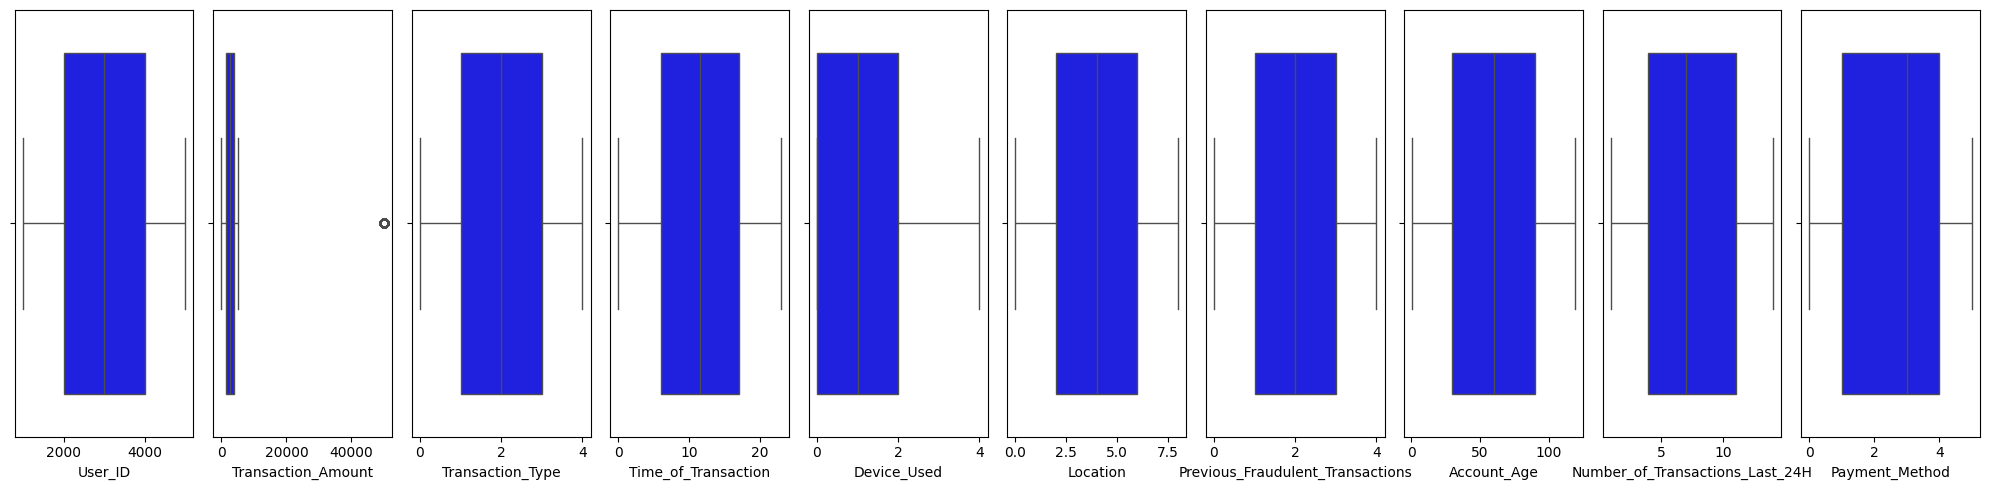

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=len(important_features), figsize=(20, 5))

for ax, col in zip(axes, important_features):
    sns.boxplot(x=fraud_data_eda[col], ax=ax, color='blue')

plt.tight_layout()
plt.show()

**There arent significant outliers in this important columns**


**The main problem identified is that the dataset has unbalanced labels for the target variable (Fraudulent), which can make it difficult for models to accurately predict the minority class. Problem can be handled by several methods:**
* **Oversampling Minority Class with SMOTE (Best for Small Datasets)**
* **Undersampling Majority Class (Risky but Fast)**
* **Adjusting Class Weights (Best for Large Datasets)**
* **Anomaly Detection (Used for Fraud/Failure Detection)**

## ***Modelling with Classic Machine Learning Algorithms*** <a class="anchor"  id="chapter5"></a>

In [19]:
fraud_data_train.shape

(51000, 32)

**Defining a function that visualizes a confusion matrix.**

In [20]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt="d", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

**Importing libraries, installing catboost, splitting and scaling the data, initializing multiple machine learning models, applying SMOTE for handling imbalance before training each model, training the models, predicting on the test data, evaluating performance using metrics and confusion matrices, collecting and sorting results, and printing the performance summary.**


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


Training Models:   0%|          | 0/8 [00:00<?, ?it/s]

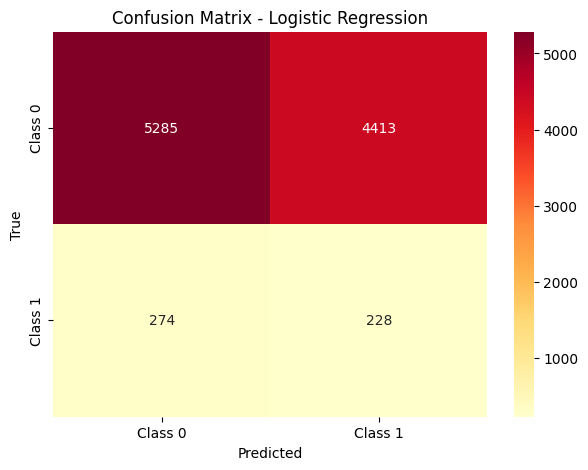

Training Models:  12%|█▎        | 1/8 [00:00<00:02,  3.19it/s]

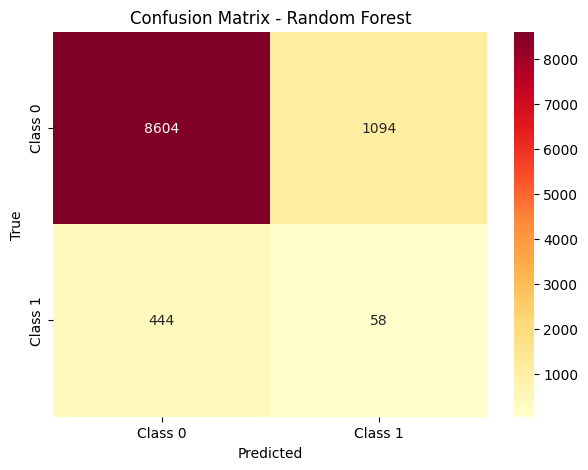

Training Models:  25%|██▌       | 2/8 [00:33<01:57, 19.53s/it]

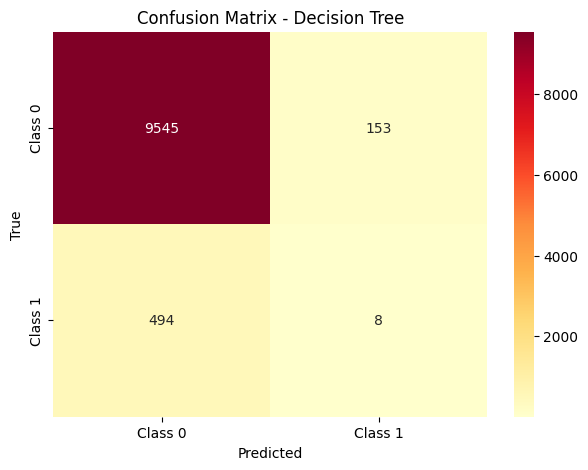

Training Models:  38%|███▊      | 3/8 [00:34<00:54, 10.96s/it]

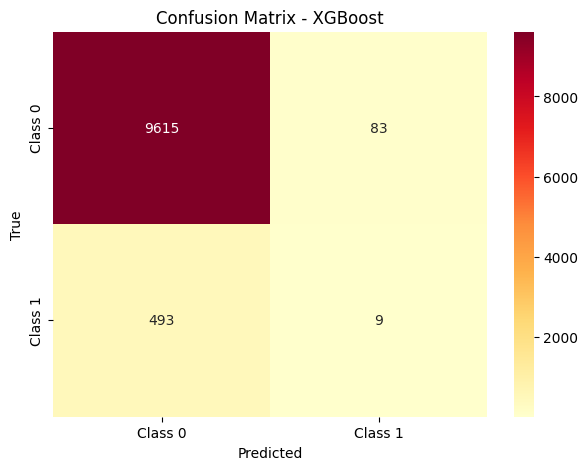

Training Models:  50%|█████     | 4/8 [00:43<00:41, 10.38s/it]

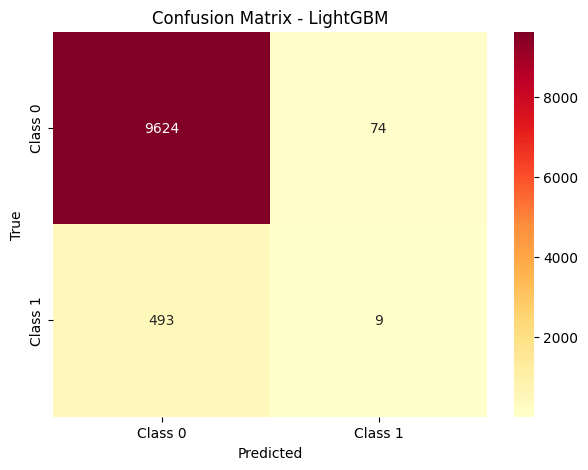

Training Models:  62%|██████▎   | 5/8 [00:51<00:28,  9.40s/it]

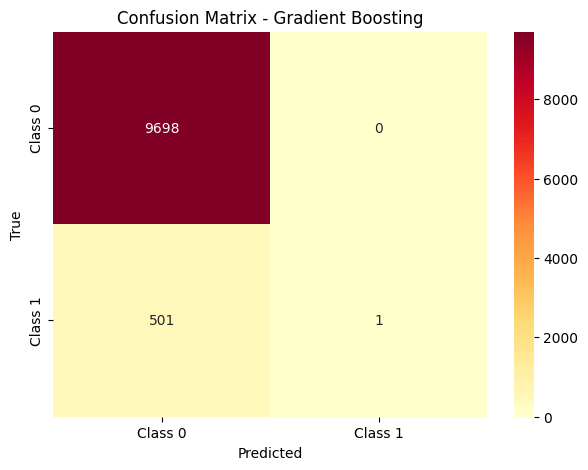

Training Models:  75%|███████▌  | 6/8 [05:24<03:18, 99.14s/it]

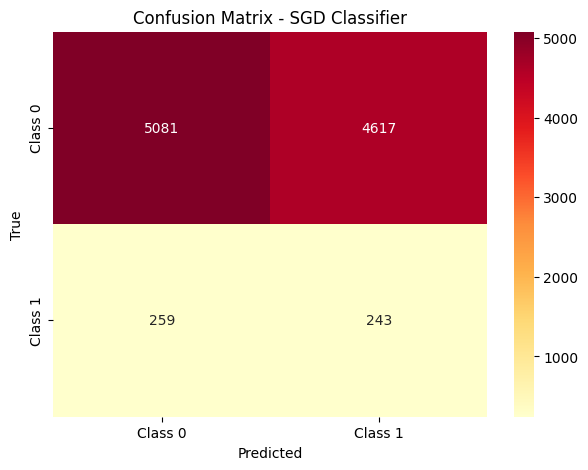

Training Models:  88%|████████▊ | 7/8 [05:25<01:07, 67.06s/it]

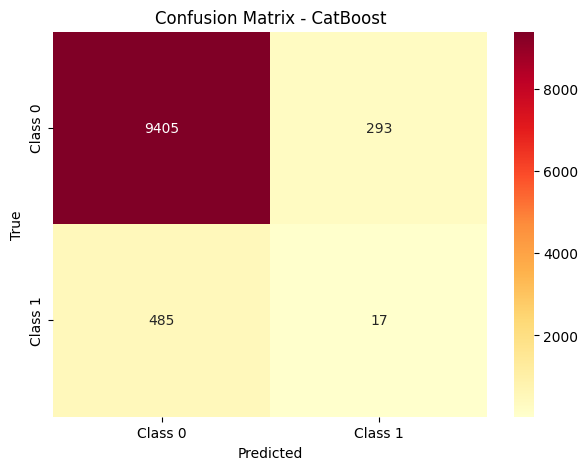

Training Models: 100%|██████████| 8/8 [05:44<00:00, 43.07s/it]

                 Model  Accuracy  F1 Score   ROC AUC
5    Gradient Boosting  0.950882  0.927040  0.498050
4             LightGBM  0.944412  0.925092  0.503038
3              XGBoost  0.943529  0.924625  0.513299
2        Decision Tree  0.936569  0.920804  0.501844
7             CatBoost  0.923725  0.915082  0.503797
1        Random Forest  0.849216  0.876230  0.496295
0  Logistic Regression  0.540490  0.663064  0.504525
6       SGD Classifier  0.521961  0.646958  0.501974


In [21]:
# Initiating a simple Logistic Regression model to set a performance benchmark

!pip install catboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE # Keep SMOTE import here as it's used in the loop
import pandas as pd
from tqdm import tqdm

# Separate features and labels using the preprocessed fraud_data_train
X = fraud_data_train.drop(['Fraudulent'], axis=1)
Y = fraud_data_train['Fraudulent']

# --- Perform Train-Test Split and Initial Scaling HERE ---
# This creates the features_train, features_test, labels_train, labels_test variables
# that will be used by this and subsequent cells.
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply StandardScaler *after* splitting, fitting only on the training data
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
# Transform test data using the scaler fitted on the training data
features_test_scaled = scaler.transform(features_test)
# --- End of Initial Scaling ---

# Now, use features_train_scaled, features_test_scaled, labels_train, labels_test
# for training and evaluation. Apply SMOTE within the loop as needed.

models = {
    # Use class_weight where available as an alternative or in addition to SMOTE
    "Logistic Regression": LogisticRegression(C=1.0, solver="liblinear", max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=5, class_weight="balanced_subsample", random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=10, criterion="gini", class_weight="balanced", random_state=42),
    # For tree-based models like XGBoost, LightGBM, CatBoost, class_weight or scale_pos_weight is often preferred over SMOTE
    # However, applying SMOTE can still be experimented with.
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, scale_pos_weight=5, subsample=0.8, colsample_bytree=0.8, eval_metric="logloss", use_label_encoder=False),
    "LightGBM": LGBMClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, num_leaves=60, min_data_in_leaf=5, force_col_wise=True, scale_pos_weight=5, verbose=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=7, min_samples_split=5), # Gradient Boosting doesn't have a direct class_weight parameter, SMOTE might be useful here
    "SGD Classifier": SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0001, max_iter=2000, tol=1e-4, class_weight="balanced"),
    "CatBoost": CatBoostClassifier(iterations=500, learning_rate=0.03, depth=7, l2_leaf_reg=5, scale_pos_weight=5, verbose=0),
}

results = []
smote = SMOTE(random_state=42) # Initialize SMOTE here

for name, model in tqdm(models.items(), desc="Training Models", total=len(models)):
    # Apply SMOTE to the training data *before* training this specific model
    # Note: Some models (like tree-based) might perform better with class_weight/scale_pos_weight
    # or without SMOTE entirely. You might experiment with applying SMOTE conditionally.
    # For this fix, we'll apply it for all models as per the original notebook's
    # intention to handle imbalance using SMOTE, but in a correct way.
    features_train_resampled, labels_train_resampled = smote.fit_resample(features_train_scaled, labels_train)

    # Train the model on the resampled and scaled training data
    model.fit(features_train_resampled, labels_train_resampled)

    # Predict on the scaled test data (which was NOT resampled)
    y_pred = model.predict(features_test_scaled)

    # Predict probabilities on the scaled test data for ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(features_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
         y_proba = model.decision_function(features_test_scaled)
    else:
        y_proba = y_pred # Fallback, though ROC AUC with just predictions is not ideal

    accuracy = accuracy_score(labels_test, y_pred)
    f1 = f1_score(labels_test, y_pred, average="weighted")
    # Handle potential errors if y_proba is not applicable
    try:
        roc_auc = roc_auc_score(labels_test, y_proba)
    except ValueError:
        roc_auc = np.nan # Or handle as appropriate if ROC AUC can't be computed

    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1, "ROC AUC": roc_auc})

    plot_confusion_matrix(labels_test, y_pred, name)

results_fraud_data = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_fraud_data)

**Printing the scores of each model for different metrics.**

In [22]:
results_fraud_data

,Model,Accuracy,F1 Score,ROC AUC
5,Gradient Boosting,0.950882,0.927040,0.498050
4,LightGBM,0.944412,0.925092,0.503038
3,XGBoost,0.943529,0.924625,0.513299
2,Decision Tree,0.936569,0.920804,0.501844
7,CatBoost,0.923725,0.915082,0.503797
1,Random Forest,0.849216,0.876230,0.496295
0,Logistic Regression,0.540490,0.663064,0.504525
6,SGD Classifier,0.521961,0.646958,0.501974


## ***Isolation Forest*** <a class="anchor"  id="chapter6"></a>

**Switching strategy to Isolation Forest for imbalance: It detects fraud as anomalies instead of balancing classes. Important: use it on original data, not SMOTE'd, as SMOTE alters the anomaly structure.**

**Training an Isolation Forest model for fraud detection. It involves:**


1.   **Importing libraries for data handling, visualization, and machine learning.**
2. **Scaling the feature data using StandardScaler.**
3. **Splitting the scaled data into training and testing sets, ensuring balanced representation of fraudulent transactions.**
4. **Training the IsolationForest model on the scaled training data to identify anomalies.
Making predictions on the test set.**
5. **Evaluating performance using a confusion matrix, classification report, and the ROC AUC score, specifically calculating ROC AUC using the model's anomaly scores.**

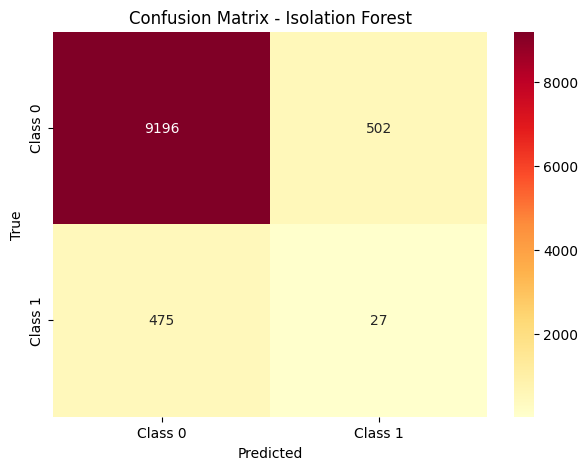

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      9698
           1       0.05      0.05      0.05       502

    accuracy                           0.90     10200
   macro avg       0.50      0.50      0.50     10200
weighted avg       0.91      0.90      0.91     10200

ROC-AUC Score: 0.5198365128884339


In [23]:
# Splitting the dataset to train and evaluate the model performance
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np # Import numpy for potential NaN handling if needed

# Assuming fraud_data_train is the preprocessed DataFrame as used previously
# Separate features and labels
X = fraud_data_train.drop(['Fraudulent'], axis=1)
Y = fraud_data_train['Fraudulent']

# Apply StandardScaler *before* splitting for Isolation Forest
# Isolation Forest is sensitive to scale for some impurity measures, though not as much as distance-based methods.
# Scaling is good practice if you might compare its results with other models.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform the train-test split *once* on the scaled data
features_train, features_test, labels_train, labels_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

# --- Isolation Forest Model ---
# Train Isolation Forest on the *original scaled training data* (features_train, labels_train)
# DO NOT use SMOTE for Isolation Forest as it's for anomaly detection on the original distribution.
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(features_train)

# Predict anomalies (-1 for anomaly, 1 for normal)
y_pred_train = iso_forest.predict(features_train)
y_pred_test = iso_forest.predict(features_test)

# Convert predictions to binary (1 for anomaly/fraudulent, 0 for normal/not fraudulent)
# Isolation Forest predicts -1 for anomalies, which we map to the fraudulent class (1)
y_pred_test_binary = [1 if x == -1 else 0 for x in y_pred_test]

# Evaluate the Isolation Forest performance
cm = confusion_matrix(labels_test, y_pred_test_binary)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt="d", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix - Isolation Forest")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Classification Report:\n", classification_report(labels_test, y_pred_test_binary))

# ROC AUC for Isolation Forest requires anomaly scores, not binary predictions.
# The decision_function gives the anomaly scores (lower is more anomalous)
# For ROC AUC, we want a score where higher values indicate the positive class (fraud).
# Since lower decision function values mean *more likely* to be anomaly (-1 prediction),
# we can negate the decision function or use a transformation where higher values correspond to fraud.
# A simple way is to use -decision_function for ROC AUC.
anomaly_scores_test = iso_forest.decision_function(features_test)
# Calculate ROC AUC using anomaly scores vs true labels (labels_test)
roc_auc = roc_auc_score(labels_test, -anomaly_scores_test) # Use -anomaly_scores as higher values should correspond to the positive class (fraud=1)

print("ROC-AUC Score:", roc_auc)

# Note: The ROC AUC calculation for Isolation Forest using decision_function
# should provide a continuous score for evaluating the model's ability
# to rank anomalies, which is more appropriate than using the binary predictions.

**Isolation Forest showed slightly better performance on predicting Class 1 (fraudulent transactions), with 27 correct predictions, but further efforts are needed to address the imbalanced data problem more effectively.**



**AutoEncoders are a good solution for this problem and are considered one of the best methods for anomaly detection. However, since we addressed the imbalance using SMOTE, we can use standard Neural Networks for our prediction.**

## ***Deep Neural Network Architecture*** <a class="anchor"  id="chapter7"></a>

**Importing necessary libraries and checking for availability of a GPU.**



In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf

In [25]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU not found. Using CPU.')
else:
    print(f'GPU found: {device_name}')

GPU found: /device:GPU:0


**Preparing the data for a machine learning model by first addressing the class imbalance and then scaling the features.**

In [26]:
X = fraud_data_train.drop(['Fraudulent'], axis=1)
Y = fraud_data_train['Fraudulent']
X, Y = smote.fit_resample(X, Y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**This code is building, compiling, training (for 100 epochs), and evaluating a deep neural network model for fraud detection, reporting accuracy, F1 score, ROC AUC, and the confusion matrix.**

In [27]:
# Splitting the dataset to train and evaluate the model performance
features_train, features_test, labels_train, labels_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

model = Sequential([
    Dense(512, input_dim=features_train.shape[1], activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    Dense(256, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(64, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(32, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(features_train, labels_train, epochs=50, batch_size=128, validation_data=(features_test, labels_test), verbose=1)

y_pred = (model.predict(features_test) > 0.5).astype(int)

accuracy = accuracy_score(labels_test, y_pred)
f1 = f1_score(labels_test, y_pred, average="weighted")
roc_auc = roc_auc_score(labels_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

cm = confusion_matrix(labels_test, y_pred)

Epoch 1/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.8064 - loss: 0.4162 - val_accuracy: 0.9630 - val_loss: 0.1401
Epoch 2/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9623 - loss: 0.1487 - val_accuracy: 0.9700 - val_loss: 0.1183
Epoch 3/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9663 - loss: 0.1328 - val_accuracy: 0.9706 - val_loss: 0.1148
Epoch 4/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9678 - loss: 0.1285 - val_accuracy: 0.9710 - val_loss: 0.1139
Epoch 5/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9674 - loss: 0.1268 - val_accuracy: 0.9709 - val_loss: 0.1137
Epoch 6/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9689 - loss: 0.1229 - val_accuracy: 0.9710 - val_loss: 0.1127
Epoch 7/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9700 - loss: 0.1185 - val_accuracy: 0.9709 - val_loss: 0.1126
Epoch 8/50
607/607 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9689 - loss: 0.1214 - val_accuracy:

**Plotting the results.**



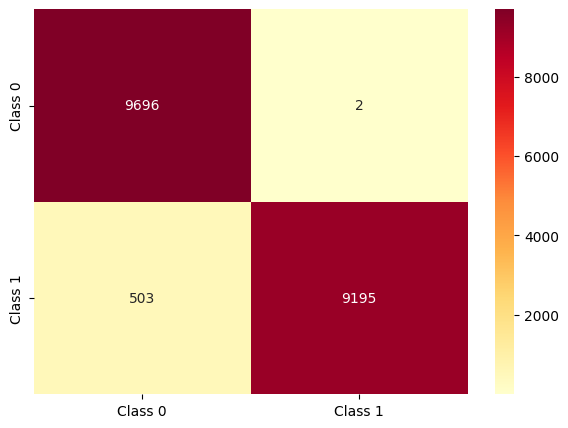

In [28]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt="d", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.show()